## Exercise Sheet No. 3

---

> Machine Learning for Natural Sciences, Summer 2025, T.T.-Prof. Pascal Friederich, pascal.friederich@kit.edu
> 
> Deadline: Monday 12.05.2025, 8:00 am
> 
> Tutor: jona.oestreicher@kit.edu  
> 
> **Please ask questions in the forum and only contact the Tutor when there are issues with the grading**
---

**Topic**: This exercise sheet will focus on linear algebra, knn classifier, precision, recall, ROC curves and feature reduction. You will continue to use ``numpy`` methods.

Please add here your group members' names and student IDs (up to 3 members per team). 

Names: Christopher Roth, Isabella Mebus Kishi de Oliveira

IDs: utxus, utmce

**Each student has to submit their own notebook, even when they worked in a team**

## 3.1 Distance function computation

It often happens, whether in the implementation of ML models or when calculating feature descriptors, that we need to compute the mutual Euclidean distance between a set of points. The Euclidean distance of two given data points can serve as a measure of how differently we think they will behave. In this exercise we will focus on an efficient `numpy` implementation of the mutual Euclidean distance between a set of points.

**3.1.1** Implement a function ``dist_loop(A,B)`` to compute the Euclidean distance between all elements of two sets of points $A \subset \mathbb{R}^{D}$ and $B \subset \mathbb{R}^{D}$. Use explicit python loops to find the distance $d_{ij} = || a_{i} - b_{j} ||$ between all points $a_{i} \in A$ and $b_{j} \in B$. The input should be two matrices of shape $N \times D$ and $M \times D$. The output should be a $N \times M$ distance matrix. For the calculation of the Euclidean distance you might want to use ``numpy.square()``, ``numpy.sum()`` and ``numpy.sqrt()``.

In [1]:
##### DO NOT CHANGE #####
import numpy as np
from numpy import random
import sys
n = 500
m = 1000
d = 3
A_data = np.reshape(random.rand(n*d),(n,d))
B_data = np.reshape(random.rand(m*d),(m,d))

print("A shape:", A_data.shape, "B shape:", B_data.shape)

##### DO NOT CHANGE #####

A shape: (500, 3) B shape: (1000, 3)


In [2]:
def dist_loop(A,B):
    N, D = A.shape
    M, _ = B.shape
    distances = np.zeros((N, M))  # Initialize distance matrix

    for i in range(N):
        for j in range(M):
            diff = A[i] - B[j]             # Vector difference
            sq_diff = np.square(diff)     # Element-wise square
            sum_sq = np.sum(sq_diff)      # Sum over dimensions
            distances[i, j] = np.sqrt(sum_sq)  # Euclidean distance

    return distances


**3.1.2** Loops are rather slow in Python, so we would like to have more time-efficient code for our numeric operations. Let's write another function ``dist_vec(A,B)`` to compute the distance relying on vectorization with ``numpy`` methods. Consult https://www.safaribooksonline.com/library/view/python-for-data/9781449323592/ch04.html and https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought if you need more information on how to do this. 

Tip: There is more than one solution. One possible solution involves adding additional dimensions to `np.arrays`, for example using `expand_dims`. In fact, when two `np.arrays` do not have matching shapes they are automatically broadcasted by repeating their respective element along the axis in question. Beside broadcasting, also the [indexing rules](https://numpy.org/doc/stable/reference/arrays.indexing.html) (required for 3.2, 3.3) of `numpy` help with vectorization to avoid python loops. For this task, you cannot use any ``scipy``  method!

In [3]:
def dist_vec(A,B):
        # Expand dimensions to (m, 1, d) and (1, n, d)
    A_exp = A[:, np.newaxis, :]  # shape (m, 1, d)
    B_exp = B[np.newaxis, :, :]  # shape (1, n, d)

    # Compute squared differences and sum along last axis (d)
    distances = np.sqrt(np.sum((A_exp - B_exp) ** 2, axis=2))  # shape (m, n)
    return distances

Let's check that the two functions return the same result. Then for each method, assign the shape of the output to the respective variable.

In [4]:
result_loop = dist_loop(A_data,B_data)
result_vec = dist_vec(A_data,B_data)
result_vec_shape = result_vec.shape # Check shape of result_loop
result_loop_shape = result_loop.shape # Check shape of result_vec
# YOUR CODE HERE
# Check if the results are equal
if np.allclose(result_loop, result_vec):
    print("Results are equal")

Results are equal


Now compare the run times of the two implementations using jupyter's ``%timeit`` command or pythons ``time``. How much faster is the vectorized version?

In [5]:
##### DO NOT CHANGE #####
# measure time for loop
%timeit result_loop = dist_loop(A_data,B_data)
# measure time for vectorized
%timeit result_vec = dist_vec(A_data,B_data)

##### DO NOT CHANGE #####

1.29 s ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.75 ms ± 203 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
speed_up_factor = 1220/8.74 # A rough estimation is okay.
# YOUR CODE HERE
print("Speed up factor: ", speed_up_factor)

Speed up factor:  139.58810068649885


Note: It is very important that you understand vectorization, indexing and broadcasting. All deep learning frameworks are based on tensor (array) operations, just like the one you implemented using ``numpy``.

In [7]:
##### DO NOT CHANGE #####
# ID: test_funs_1 - possible points: 3

# Test for grading
assert callable(dist_loop)
assert dist_loop(np.reshape(np.arange(12),(4,3)),np.reshape(np.arange(6),(2,3))).shape==(4,2), 'wrong distance matrix dimensions'
# Hidden tests check with random inputs that the function returns the correct values

##### DO NOT CHANGE #####

In [8]:
##### DO NOT CHANGE #####
# ID: test_funs_2 - possible points: 3

assert callable(dist_vec)
# Hidden tests check with random inputs that the function returns the correct values

##### DO NOT CHANGE #####

In [9]:
##### DO NOT CHANGE #####
# ID: test_loop_vec_diff - possible points: 1

# Test for grading
assert result_loop is not None
assert result_vec is not None
# Hidden tests to check that the functions returned same values

##### DO NOT CHANGE #####

In [10]:
##### DO NOT CHANGE #####
# ID: test_shape_dist - possible points: 2

assert result_vec_shape is not None
assert result_loop_shape is not None
# Hidden tests to check that the functions returned outputs with correct shape

##### DO NOT CHANGE #####

In [11]:
##### DO NOT CHANGE #####
# ID: speed_up_test - possible points: 1

# Test for grading
assert speed_up_factor > 0
# Hidden test to check if speed up factor lies on an expected interval

##### DO NOT CHANGE #####

## 3.2 Precision-Recall Curves

In this section, we will use sklearn's digits dataset (64 pixels, grey scale) for an image classification task. <br> 
We will use a k-nearest neighbors (k-NN) classifier to discriminate the images depending on the digit they represent. We will keep a small subset of the dataset to train our classifier and then use our trained model on the remaining images. <br>
To apply k-NN we need to choose a measure of similarity: we will use the previously implemented function to compute the Euclidian distance between couples of image vectors. <br> 
Let's start loading the dataset, splitting it in a train and a test set and having a look at some of the images.

Train set shape: (35, 64); test set shape: (1762, 64)


Example of images from classes: [0 1 2]


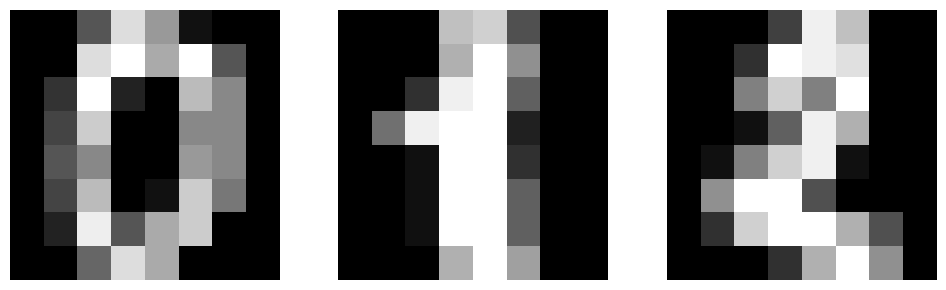

In [12]:
##### DO NOT CHANGE #####
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read and prepare the digits data
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]

# split data in train and test set
X_labeled, X_unknown, y_labeled, y_unknown = train_test_split(data, target, test_size=0.98, random_state=42)
print(f'Train set shape: {X_labeled.shape}; test set shape: {X_unknown.shape}\n\n')

# Show digits
print(f'Example of images from classes: {target[:3]}')
fig = plt.figure(figsize = (10,3))
plt.gray()
plt.subplot(1,3,1); plt.axis('off')
plt.imshow(images[0])
plt.subplot(1,3,2); plt.axis('off')
plt.imshow(images[1])
plt.subplot(1,3,3); plt.axis('off')
plt.imshow(images[2])
fig.tight_layout(); plt.show()

##### DO NOT CHANGE #####

$\textbf{k-NN}$ is a simple non-parametric model. For each datapoint in the test set we want to build a list, sorted by the chosen similarity measure, of all the datapoints in the train set. Then the output of the classifier is determined by the "votes" of the k closest train datapoints, of which we assume we know the correct label. For example we can simply select as predicted class the most common class among the closest neighbors, with a majority vote. Or, in a binary classification setting, define the probability of an object to belong to a given class as the normalized number of positive votes and then predict positively if the probability is over a pre-set threshold.

Let's implement a simple k-NN classifier that can work both for a multiclass setting and as binary classifier when we specify a digit of interest. We will use the binary classifier to discuss some common performance metrics later on.

As introduced above, we will use the Euclidean distance between pixel values as similarity measure:

$d(X_i,X_{i'} ) = || X_i - X_{i'}||_2$

To efficiently compute these distances, you should use vectorization from exercise 3.1. Let $D$
be the full dissimilarity matrix, i.e. $D_{i i'} = d(X_i,X_{i'})$. An ``np.argsort()`` of row $D_i$ now gives the similarity ordering, relative to image $X_i$, of all images $X_{i'}$ in the train set.


Note: If you didn't manage to solve 3.1 you can now use `scipy.spatial.distance.cdist`. But you do not get points for this solution in 3.1.

In [13]:
from collections import Counter
from scipy.spatial.distance import cdist


class Knn_Classifier:
    def __init__(self, X_unknown, X_labeled, y_labeled):
        D = dist_vec(X_unknown, X_labeled)        # compute distances from each X_unknown to each X_labeled 
        nn = np.argsort(D)               # order neighbors from closest to furthest
        self.nn_targets = y_labeled[nn]   # store labels (our 'votes') of the ordered neighbors (given by y_labeled)
        # YOUR CODE HERE
  
        

    def set_k(self, k):
        self.knn_targets = self.nn_targets[:, :k] # restrict list of labels to k closest neighbors
        # YOUR CODE HERE
        self.k = k

    def __call__(self, label: int = None, threshold: float = .5):
        counters = [Counter(self.knn_targets[i]) for i in range(self.knn_targets.shape[0])]
        if label is None:
            # multiclass classifier, for each data point it outputs the most "voted" class by the neighbors
            preds = np.asarray([c.most_common(1)[0][0] for c in counters])
            return preds
        else:
            # binary classifier for digit 'label'
            # computes the probability a given data point belongs to a class or to any of the others
            # as the number of votes for that class normalized over the total number of votes
            probs = np.asarray([c.get(label, 0)/sum(c.values()) for c in counters])
            # predicts as belonging to the class 'label' if the computed probability exceeds the threshold
            preds = (probs>=threshold).astype(int)
            return preds, probs

Let's run a multiclass knn classification setting the number of neighbors k to 5. 

To have an overview of the goodness of the classification we will print a $\textbf{confusion matrix}$. A confusion matrix is defined as the matrix $C$ such that $C_{ij}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$. It can be easily computed using the function "confusion_matrix" from sklearn.metrics and we'll plot it using seaborn heatmaps.

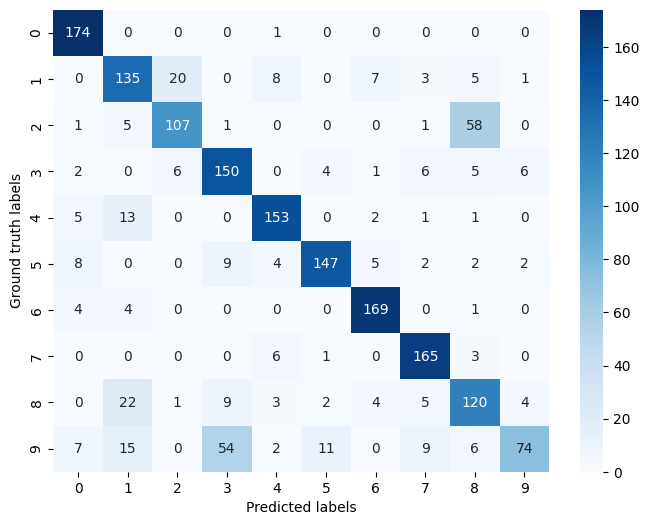

In [14]:
##### DO NOT CHANGE #####
import seaborn as sns
from sklearn.metrics import confusion_matrix

knn = Knn_Classifier(X_unknown, X_labeled, y_labeled)
knn.set_k(5)
preds = knn()
cf_matrix = confusion_matrix(y_unknown, preds)

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Ground truth labels')
plt.show()
plt.close()

##### DO NOT CHANGE #####

Each row of the confusion matrix represents the instances in an actual class while each column represents the instances in a predicted class. Once produced, we can use it directly to compute some performance measures. We will have a look at two evaluation metrics used to assess the performance of a machine learning model in a binary classification problem: precision and recall. 

In a binary setting, so considering in our example one class against all other classes, we can define:
<ol>
<li><p>true positives (TP): number of objects belonging to the class that were $\textbf{correctly}$ predicted as belonging to it; </p>
<li><p> true negatives (TN): number of objects $\textbf{not}$ belonging to the class that were $\textbf{correctly}$ predicted as $\textbf{not}$ belonging to it; </p>
<li><p> false positives (FP): number of objects $\textbf{not}$ belonging to the class that were $\textbf{incorrectly}$ predicted as belonging to it; </p>
<li><p> false negatives (FN): number of objects belonging to the class that were $\textbf{incorrectly}$ predicted as $\textbf{not}$ belonging to it; </p>
</ol>

Given these four quantities we can define:
<ol>
<li><p>$\textbf{Precision}$, or positive predictive value, is the proportion of true positive predictions among all the positive predictions made by the model. In formulas: $\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$</p>

<li><p>$\textbf{Recall}$, also termed sensitivity or probability of detection, is the proportion of true positive predictions among all the actual positive cases in the dataset. In formulas: $\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$.</p>
</ol>


A high precision indicates that the model is making few false positive predictions, i.e., positive predictions are correct. A high recall indicates that the model is making few false negative predictions, i.e., the model is correctly identifying all positive cases in the dataset. Ideally we would like both of these measures to be equal to 1, meaning that all objects predicted as belonging to the class are actually from that class (precision=1) and all objects belonging to the class are correctly predicted as belonging to it (recall=1). In general, there is a trade-off between precision and recall: increasing one metric often comes at the expense of the other.  

Let's compute precision and recall of our multiclass k-NN classifier using the confusion matrix we computed above.

In [15]:
for label in range(3):
    print(f'Performance of multiclass classifier for digit {label} VS all others:')
    # to access predictions relative to a given class i we select the i-th column of the confusion matrix
    column_counts = cf_matrix[:, label]
    # the i-th row corresponds to the images actually belonging to class i 
    row_counts = cf_matrix[label]

    TP = column_counts[label]
    FP = sum(column_counts) - column_counts[label]
    FN = sum(row_counts) - row_counts[label]
    
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    print(f'\t-True positives: {TP}')
    print(f'\t-False positives: {FP}')
    print(f'\t-False negatives: {FN}')
    print(f'\t-Precision: {precision:.2f}')
    print(f'\t-Recall: {recall:.2f}')

Performance of multiclass classifier for digit 0 VS all others:
	-True positives: 174
	-False positives: 27
	-False negatives: 1
	-Precision: 0.87
	-Recall: 0.99
Performance of multiclass classifier for digit 1 VS all others:
	-True positives: 135
	-False positives: 59
	-False negatives: 44
	-Precision: 0.70
	-Recall: 0.75
Performance of multiclass classifier for digit 2 VS all others:
	-True positives: 107
	-False positives: 27
	-False negatives: 66
	-Precision: 0.80
	-Recall: 0.62


We have seen how to compute precision and recall with respect to each digit using the confusion matrix produced in our multiclass setting. We are now going to switch to binary classification and metrics to introduce a useful tool, the receiver operating characteristic curve, or ROC curve. The ROC curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It plots the true positive rate (TPR), which is another name for the recall, against the false positive rate (FPR) at various classification thresholds.

We need now to define a new measure. The FPR, also termed fall-out or false alarm ratio, measures the proportion of negative cases that are incorrectly classified as positive, in formulas $\text{recall} = \frac{\text{FP}}{\text{FP} + \text{TN}}$.

Let's implement a function that given a k-NN model, the label of interest and a classification threshold, computes all the performance measures we discussed until now.

In [16]:
def compute_binary_metrics(knn, label: int, ground_truth: np.ndarray, threshold: float = .3):
    metrics = {}
    preds, probs = knn(label, threshold)
    target = (ground_truth==label).astype(int)
    metrics['TP'] = int(np.sum((preds == 1) & (target == 1)))  # true positives
    metrics['FP'] = int(np.sum((preds == 1) & (target == 0)))  # false positives
    metrics['TN'] = int(np.sum((preds == 0) & (target == 0)))  # true negatives
    metrics['FN'] = int(np.sum((preds == 0) & (target == 1)))  # false negatives
    # YOUR CODE HERE
    metrics['precision'] = metrics['TP']/(metrics['TP']+metrics['FP']) if metrics['TP']>0 else 0
    metrics['recall'] = metrics['TP']/(metrics['TP']+metrics['FN']) if metrics['TP']>0 else 0
    metrics['fall-out'] = metrics['FP']/(metrics['FP']+metrics['TN']) if metrics['FP']>0 else 0
    # YOUR CODE HERE
    return metrics

Let's test our function and compare the metrics with the previously computed ones. 

What is different now, with respect to the multiclass setting, is that we can set a classification threshold. Check how changing the threshold changes the values of our metrics.

In [17]:
# modify the threshold_ parameter within the interval (0,1)
# see how the metrics are affected
threshold_ = .3
knn.set_k(5)
for label in range(3):
    print(f'Performance of binary classifier for digit {label}:')
    metrics = compute_binary_metrics(knn, label, y_unknown, threshold=threshold_)
    for k, v in metrics.items():
        print(f'\t-{k}: {v:.2f}')

Performance of binary classifier for digit 0:
	-TP: 174.00
	-FP: 72.00
	-TN: 1515.00
	-FN: 1.00
	-precision: 0.71
	-recall: 0.99
	-fall-out: 0.05
Performance of binary classifier for digit 1:
	-TP: 140.00
	-FP: 97.00
	-TN: 1486.00
	-FN: 39.00
	-precision: 0.59
	-recall: 0.78
	-fall-out: 0.06
Performance of binary classifier for digit 2:
	-TP: 147.00
	-FP: 62.00
	-TN: 1527.00
	-FN: 26.00
	-precision: 0.70
	-recall: 0.85
	-fall-out: 0.04


Now, we can use these binary metrics to compute overall multi-class metrics using the following aggregation methods:<ol>
<li><p>Micro-averaging: In micro-averaging, we aggregate the binary metrics over all the classes. This means that we sum up the number of true positives, false positives, false negatives, and true negatives over all the classes and then compute the performance metrics.</p>
<li><p>Macro-averaging: In macro-averaging, we compute the binary metrics, e.g. precision, for each class separately and then take the average across all the classes. Macro-averaging gives equal weight to all classes and is suitable when we want to evaluate the performance of each class separately.</p>
<li><p>Weighted averaging: In weighted averaging, we compute the binary metrics for each class separately and then take the weighted average across all the classes. The weight of each class is proportional to the number of samples from that class in the dataset. Weighted averaging is most suitable averaging technique when the dataset is unbalanced among the various classes.</p>
</ol>


We can use the function below to compute multi-class performance measures, aggregating the corresponding binary metrics with weighted averaging. 

In [18]:
##### DO NOT CHANGE #####
def compute_multiclass_metrics(knn, ground_truth, threshold=.3, labels=np.arange(10)):
    metrics_list = []
    for label in labels:
        metrics_list.append(compute_binary_metrics(knn, label, ground_truth, threshold))
        weights = np.asarray([(ground_truth==label).sum() for label in labels])
    multiclass_metrics = {}
    for m in ['precision', 'recall', 'fall-out']:
        multiclass_metrics[m] = sum([weights[i]*metrics_list[i][m] for i in range(len(labels))])/weights.sum()
    return multiclass_metrics, metrics_list

##### DO NOT CHANGE #####

In [19]:
knn.set_k(5)
metrics, _ = compute_multiclass_metrics(knn, y_unknown, threshold=.3)
print(f'Multiclass knn performance, weighted average: ')
for k, v in metrics.items():
    print(f'\t-{k}: {v:.2f}')

Multiclass knn performance, weighted average: 
	-precision: 0.64
	-recall: 0.84
	-fall-out: 0.05


As stated above, the ROC curve is generated by calculating the TPR and FPR for different threshold values, ranging from 0 to 1. As the threshold increases, the model becomes more conservative, classifying fewer instances as positive, which leads to a decrease in the FPR and TPR. Conversely, as the threshold decreases, the model becomes more aggressive, classifying more instances as positive, which leads to an increase in the FPR and TPR.

A perfect classifier would have a ROC curve that passes through the top-left corner of the plot (TPR=1, FPR=0), indicating a TPR of 100% and an FPR of 0%. The area under the ROC curve (AUC) is a measure of the overall performance of the classifier, with a value of 1 indicating a perfect classifier and a value of 0.5 indicating a classifier that is no better than random guessing.

The following code plots the Recall VS Precision (RvP) curve and the ROC curve (with AUC), so that we can see how modifying the threshold gives us classifiers with different trade-offs for the metrics.

In [20]:
##### DO NOT CHANGE #####
def plot_measures(knn, y_unknown, plot_type='ROC', all=True):
    measures = {'ROC':('fall-out', 'recall'), 'RvP': ('recall', 'precision')}
    measures = measures[plot_type]
    m0 = {k:[] for k in ['mc']+list(range(10))}
    m1 = {k:[] for k in ['mc']+list(range(10))}
    for threshold in np.arange(0,1,.1):
        mc, bin = compute_multiclass_metrics(
                        knn, 
                        y_unknown, 
                        threshold)
        m0['mc'].append(mc[measures[0]])
        m1['mc'].append(mc[measures[1]])
        for i in range(10):
            m0[i].append(bin[i][measures[0]])
            m1[i].append(bin[i][measures[1]])
    if all:
        for i in range(10):
            plt.plot(m0[i][::-1], m1[i][::-1], label='digit_'+str(i))
    plt.plot(m0['mc'][::-1], m1['mc'][::-1], label='multiclass')
    auc = ''
    if plot_type=='ROC':
        plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random_guess')
        auc = np.abs(np.trapezoid(y=m1['mc'][::-1], x=m0['mc'][::-1]))
        auc = f', AUC: {auc:.3f}'
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel(measures[0])
    plt.ylabel(measures[1])
    plt.title(plot_type+auc)
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()

##### DO NOT CHANGE #####

Let's plot some of the curves varying the number of neighbors we use for the classification.

2.0.0
K: 2


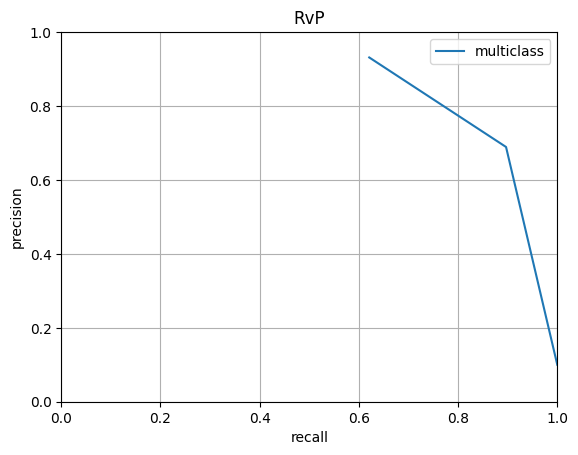

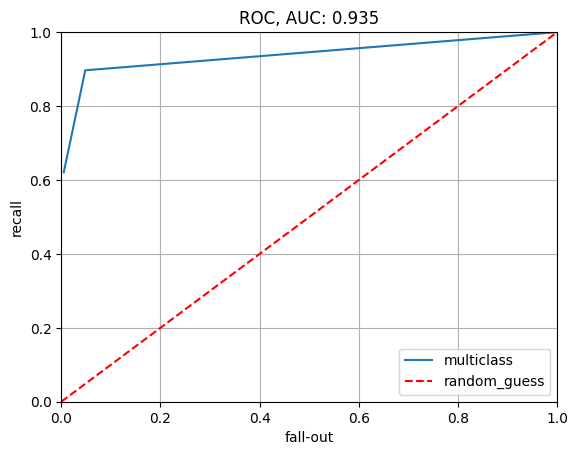

K: 5


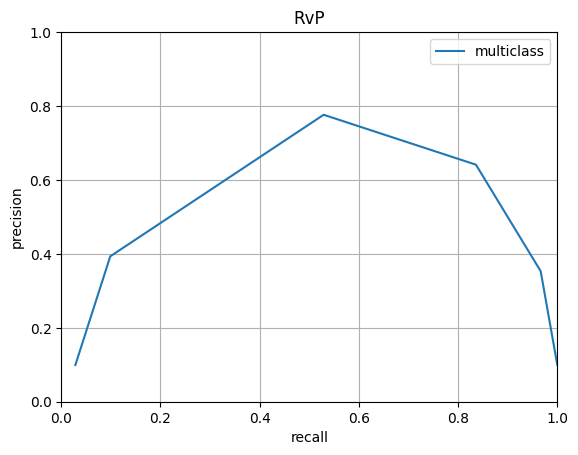

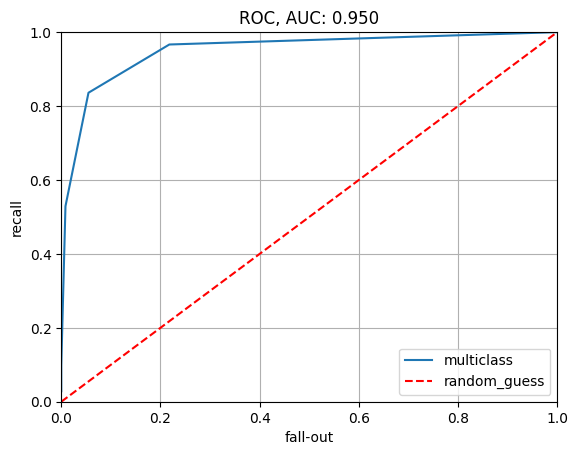

K: 20


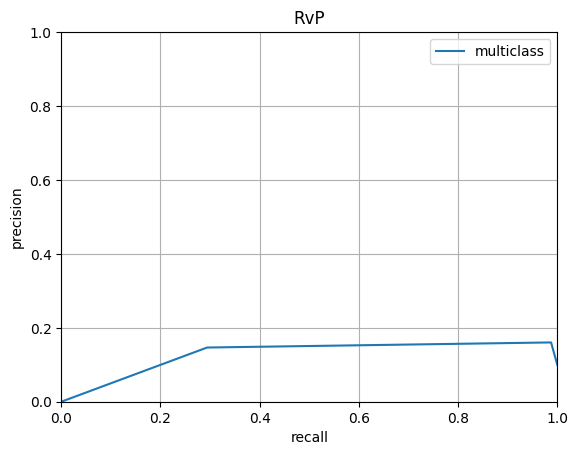

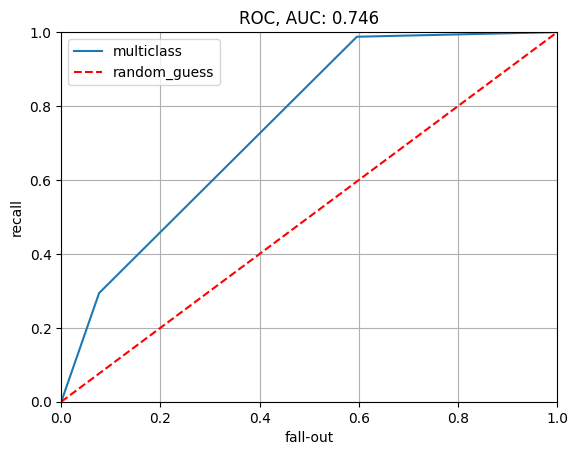

In [21]:
print(np.__version__)
for k in [2, 5, 20]:
    print(f'K: {k}')
    knn.set_k(k)
    plot_measures(knn, y_unknown, all=False, plot_type='RvP')
    plot_measures(knn, y_unknown, all=False, plot_type='ROC')

In [22]:
##### DO NOT CHANGE #####
# ID: knn_classifier_test - possible points: 3

# Test for grading
knn = Knn_Classifier(X_unknown, X_labeled, y_labeled)
res = np.asarray([3, 8, 3, 3, 8, 9, 5, 5, 2, 9, 6, 7, 2, 2, 7, 8, 0, 1, 2, 0, 5, 6, 8, 1, 1, 6, 0, 7, 7, 4, 4, 4, 4, 4, 4])
assert np.all(knn.nn_targets[2]==res), 'visible test: something wrong in nn_targets'

knn.set_k(5)
assert knn.knn_targets.shape[-1]==5, 'visible test: something wrong in knn_targets shape'

#similar test as above, hidden

##### DO NOT CHANGE #####

In [23]:
##### DO NOT CHANGE #####
# ID: binary_metrics_test - possible points: 2

# Test for grading
knn = Knn_Classifier(X_unknown, X_labeled, y_labeled)
knn.set_k(5)
metrics = compute_binary_metrics(knn, label=5, ground_truth=y_unknown, threshold=.3)
res = {'TP': 141, 'FP': 38, 'TN': 1545, 'FN': 38, 'precision': 0.7877094972067039, 'recall': 0.7877094972067039, 'fall-out': 0.024005053695514846}
for k in metrics.keys():
    assert metrics[k]==res[k], f'visible test: metric {k} is wrong'

#similar test as above, hidden

##### DO NOT CHANGE #####

### 3.3 Dimensionality reduction with PCA

Now we will try to reduce the number of features or pixels to two and re-test the precision/recall curves from exercise 3.2.

We will try with an unsupervised method, namely via Principle Component Analysis (PCA). The task is to use `scikit-learn`'s implementation of the PCA to reduce the number of pixels to two and then to make a scatter plot of the new features, where the color of each point represents the digits number.  Which property should this scatterplot have in order for the new features to be especially suitable for similarity search?

Implement a pca model using the imported sklearn function and transform the image features retaining only 2 components.

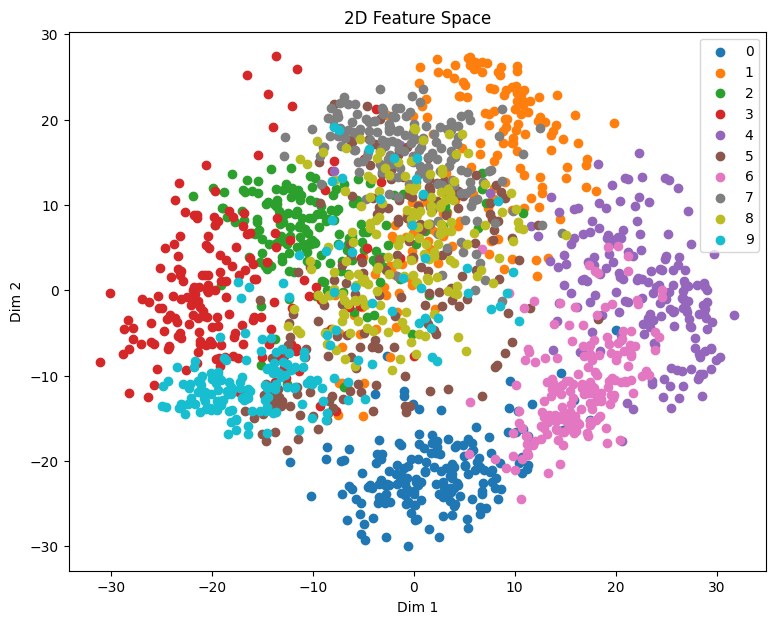

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_features_pca = pca.fit_transform(X_unknown)
# YOUR CODE HERE
plt.figure(figsize=(9, 7))
for i in range(10):
    plt.scatter(new_features_pca [y_unknown==i, 0], new_features_pca [y_unknown==i, 1], label=str(i))
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('2D Feature Space')
plt.legend()
plt.show()
plt.close()

In [25]:
##### DO NOT CHANGE #####
# ID: PCA_test - possible points: 1

# Test for grading
#checking if correct number of components is retained in new_features_pca

##### DO NOT CHANGE #####

We fixed the number of components to be retained by the PCA to 2, so that we could easily visualize them with the scatter plot. What would be more sensible is to select a number of components sufficient enough to represent the variance of the data, in such a way to keep almost all valuable information carried by our features, but hopefully smaller than the total number of features, so to avoid redundancy. 

That's what we are doing next.

In [26]:
pca = PCA()
pca.fit(X_labeled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_dim = next(ind for ind, x in enumerate(explained_variance) if x > .9)
print(f'Original number of features: {X_labeled.shape[-1]}')
print(f'Using only {n_dim} dimensions is enough to explain the 90% of the variance in the data')

Original number of features: 64
Using only 12 dimensions is enough to explain the 90% of the variance in the data


Let's plot now the ROC curves of the knn classifier trained using all features and of the knn classifier with PCA reduced features. The performance improves only slightly in this specific example, but PCA reduction is a useful method to avoid overfitting in settings where the dimension of the dataset is small with respect to the dimension of the feature space.

ROC curve of knn classifier using all available features


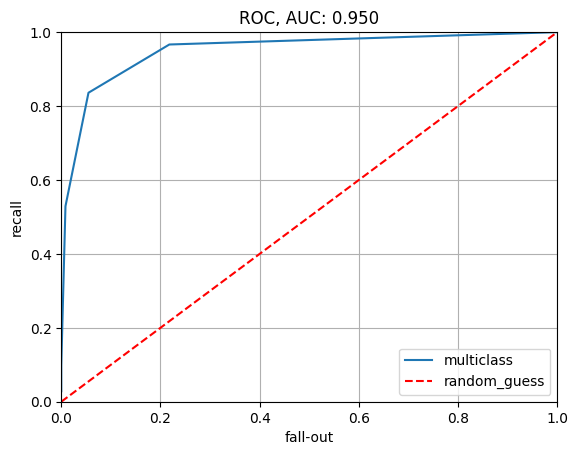

ROC curve of knn classifier using 12 most "important" features


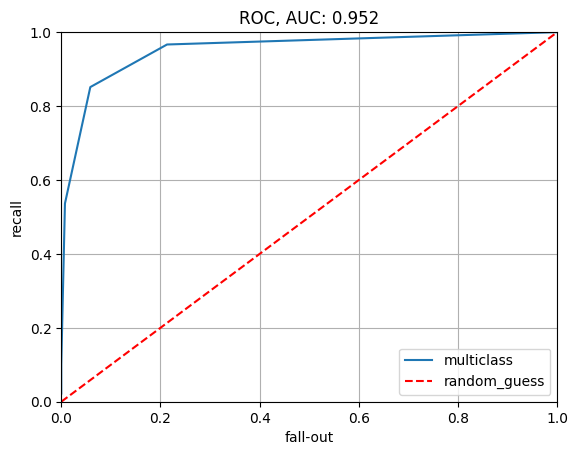

In [27]:
print('ROC curve of knn classifier using all available features')
knn = Knn_Classifier(X_unknown, X_labeled, y_labeled)
knn.set_k(5)
plot_measures(knn, y_unknown, all=False, plot_type='ROC')

print(f'ROC curve of knn classifier using {n_dim} most "important" features')
pca = PCA(n_components=n_dim)
pca.fit(X_labeled)
knn = Knn_Classifier(pca.transform(X_unknown), pca.transform(X_labeled), y_labeled)
knn.set_k(5)
plot_measures(knn, y_unknown, all=False, plot_type='ROC')

# Submitting your solution

As a last step, the notebook should be uploaded to Ilias such that we can grade it.